# H-He Mixture Simulation

In [1]:
# Import the usual libraries
%pylab
%matplotlib inline
import os
import seaborn as sns


# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess
from sarkas.tools.transport import TransportCoefficient

# Create the file path to the YAML input file
input_file_name = os.path.join('tutorial_yaml_files', 'BIM_cgs.yaml')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
sim = Simulation(input_file_name)
sim.setup(read_yaml=True)
sim.run()







________             ______                
__  ___/_____ __________  /_______ ________
_____ \_  __ `/_  ___/_  //_/  __ `/_  ___/
____/ // /_/ /_  /   _  ,<  / /_/ /_(__  ) 
/____/ \__,_/ /_/    /_/|_| \__,_/ /____/  
                                           


An open-source pure-python molecular dynamics code for non-ideal plasmas.


  0%|          | 0/2500 [00:00<?, ?it/s]



----------------- Simulation -----------------------

Job ID:  bim
Job directory:  Simulations/bim
Equilibration dumps directory:  Simulations/bim/Equilibration/dumps
Production dumps directory:  Simulations/bim/Production/dumps

Units:  cgs
Total No. of particles =  2500

Particle Species:
No. of species =  2
Species 1 : H
	Species ID: 0
	No. of particles = 625 
	Number density = 4.050000e+27 [N/cc]
	Mass = 1.672622e-24 [g]
	Charge = 4.803205e-10 [esu]
	Temperature = 1.678013e+05 [K]
Species 2 : He
	Species ID: 1
	No. of particles = 1875 
	Number density = 1.215000e+28 [N/cc]
	Mass = 6.690488e-24 [g]
	Charge = 9.606409e-10 [esu]
	Temperature = 1.678013e+05 [K]

Lengths scales:
Wigner-Seitz radius = 2.451689e-10 [cm]
No. of non-zero box dimensions =  3
Box length along x axis = 2.187810e+01 a_ws = 5.363830e-09 [cm]
Box length along y axis = 2.187810e+01 a_ws = 5.363830e-09 [cm]
Box length along z axis = 2.187810e+01 a_ws = 5.363830e-09 [cm]
The remaining lengths scales are given in [

  0%|          | 2/10000 [00:00<10:35, 15.74it/s]


Equilibration Time: 0 hrs 2 min 30 sec

------------- Production -------------


100%|██████████| 10000/10000 [10:46<00:00, 15.47it/s]


Production Time: 0 hrs 10 min 46 sec

Total Time: 0 hrs 13 min 18 sec


In [3]:
postproc = PostProcess(input_file_name)
postproc.setup(read_yaml=True)

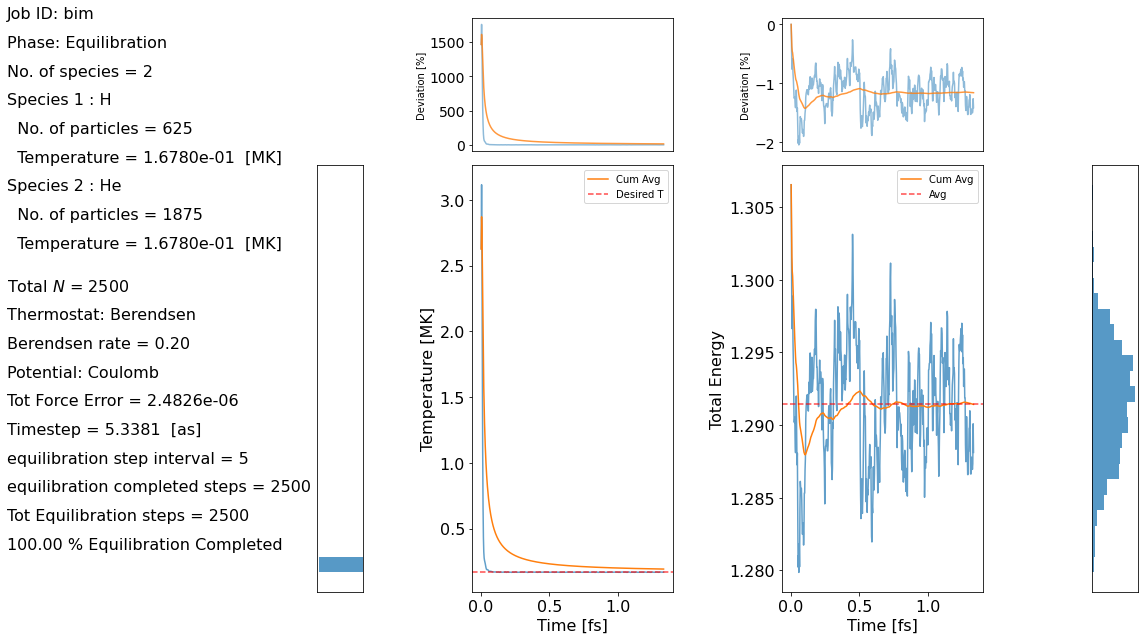

In [4]:
# Equilibration check
postproc.therm.setup(postproc.parameters)
postproc.therm.temp_energy_plot(postproc, phase='equilibration')


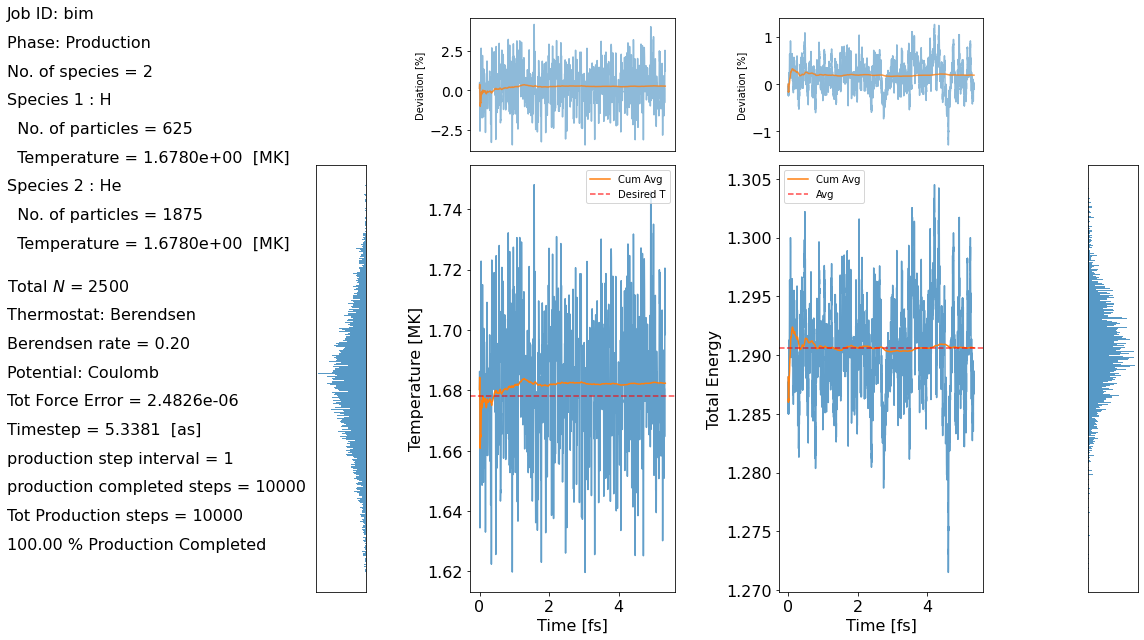

In [5]:
# Production check
postproc.therm.temp_energy_plot(postproc, phase='production')

  0%|          | 18/10001 [00:00<01:02, 160.85it/s]


File Simulations/bim/PostProcessing/VelocityAutoCorrelationFunction/Production/VelocityACF_bim.csv not found!

Computing Observable now ...
Parsing particles' velocities.


100%|██████████| 10001/10001 [00:10<00:00, 940.17it/s]


Calculating vacf with time averaging off...


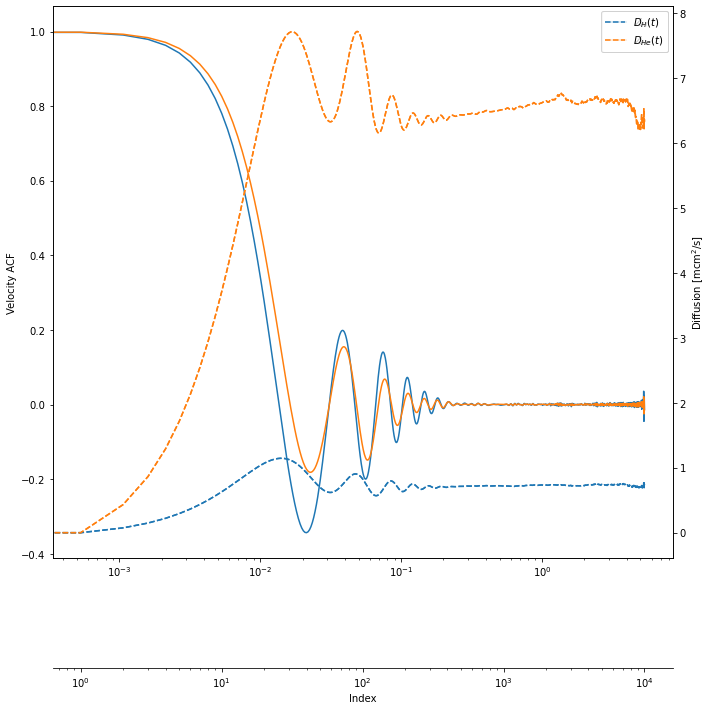

In [6]:
diffusion = TransportCoefficient.diffusion(postproc.parameters,
                                           phase='production')

  1%|          | 88/10001 [00:00<00:11, 873.03it/s]


File Simulations/bim/PostProcessing/DiffusionFluxAutoCorrelationFunction/Production/DiffusionFluxACF_bim.csv not found!

Computing Observable now ...
Parsing particles' velocities.


100%|██████████| 10001/10001 [00:10<00:00, 958.95it/s]


Calculating diffusion flux acf with time averaging off ...


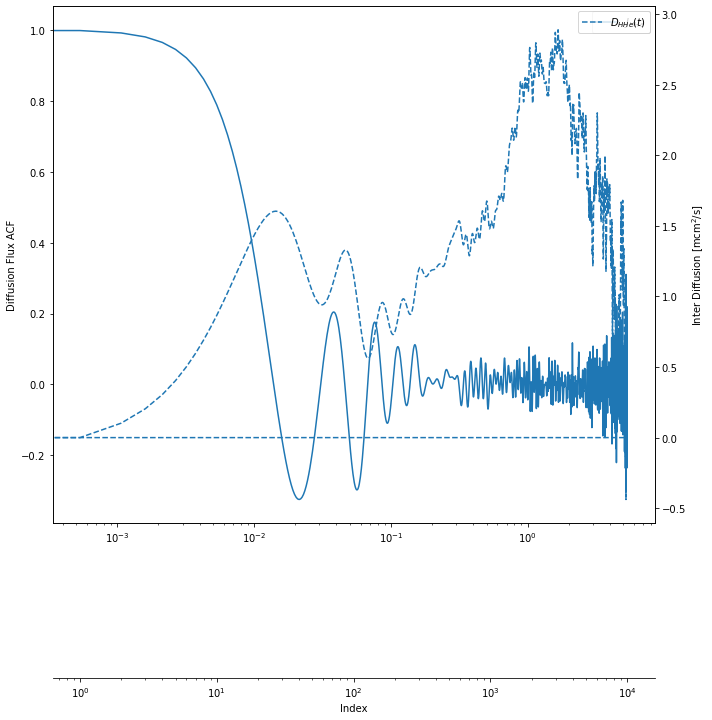

In [7]:
interdiffusion = TransportCoefficient.interdiffusion(postproc.parameters,
                                           phase='production')

In [8]:
Zavg = (postproc.parameters.species_charges.transpose() @ postproc.parameters.species_concentrations)
mavg = (postproc.parameters.species_masses.transpose() @ postproc.parameters.species_concentrations)

In [9]:
w_vaa = np.sqrt(4 * np.pi* Zavg**2 * postproc.parameters.total_num_density/mavg)

In [10]:
for i, col in enumerate(interdiffusion.columns[1:], 1):
    interdiffusion[col] /= (w_vaa * postproc.parameters.a_ws**2)

for i, col in enumerate(diffusion.columns[1:], 1):
    diffusion[col] /= (w_vaa * postproc.parameters.a_ws**2)

<AxesSubplot:xlabel='Time'>

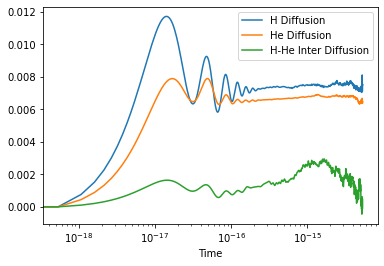

In [11]:
ax = diffusion.plot(x='Time', logx = True)
interdiffusion.plot(x = 'Time', y = 'H-He Inter Diffusion', logx = True, ax = ax)